<a href="https://www.kaggle.com/code/anshulm257/eda-optimizing-xgboost-hyperparameters-0-89428?scriptVersionId=197136738" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

CatBoost has demonstrated dominant performance in this competition, attempting to tune XGBoost to find its optimal parameters and enhance its performance.

Open to suggestions and feedback, If you like this work, please upvote. Thank you!

In [1]:
#Importing Necessary Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import polars as pl
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import warnings
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
warnings.simplefilter('ignore')

/kaggle/input/playground-series-s4e7/sample_submission.csv
/kaggle/input/playground-series-s4e7/train.csv
/kaggle/input/playground-series-s4e7/test.csv
/kaggle/input/health-insurance-cross-sell-prediction/sample_submission.csv
/kaggle/input/health-insurance-cross-sell-prediction/train.csv
/kaggle/input/health-insurance-cross-sell-prediction/test.csv


In [2]:
train_eda = pd.read_csv('/kaggle/input/playground-series-s4e7/train.csv')
train_o = pl.read_csv('/kaggle/input/health-insurance-cross-sell-prediction/train.csv')

train_n = pl.read_csv('/kaggle/input/playground-series-s4e7/train.csv')
train = pl.concat([train_n, train_o])

test = pl.read_csv('/kaggle/input/playground-series-s4e7/test.csv')
test = test.with_columns(pl.lit(0).cast(pl.Int64).alias('Response'))
train

shape: (11_885_907, 12)
┌────────┬────────┬─────┬────────────────┬───┬────────────────┬───────────────┬─────────┬──────────┐
│ id     ┆ Gender ┆ Age ┆ Driving_Licens ┆ … ┆ Annual_Premium ┆ Policy_Sales_ ┆ Vintage ┆ Response │
│ ---    ┆ ---    ┆ --- ┆ e              ┆   ┆ ---            ┆ Channel       ┆ ---     ┆ ---      │
│ i64    ┆ str    ┆ i64 ┆ ---            ┆   ┆ f64            ┆ ---           ┆ i64     ┆ i64      │
│        ┆        ┆     ┆ i64            ┆   ┆                ┆ f64           ┆         ┆          │
╞════════╪════════╪═════╪════════════════╪═══╪════════════════╪═══════════════╪═════════╪══════════╡
│ 0      ┆ Male   ┆ 21  ┆ 1              ┆ … ┆ 65101.0        ┆ 124.0         ┆ 187     ┆ 0        │
│ 1      ┆ Male   ┆ 43  ┆ 1              ┆ … ┆ 58911.0        ┆ 26.0          ┆ 288     ┆ 1        │
│ 2      ┆ Female ┆ 25  ┆ 1              ┆ … ┆ 38043.0        ┆ 152.0         ┆ 254     ┆ 0        │
│ 3      ┆ Female ┆ 35  ┆ 1              ┆ … ┆ 2630.0         ┆ 156.0         ┆ 76      ┆ 0        │
│ 4      ┆ Female ┆ 36  ┆ 1              ┆ … ┆ 31951.0        ┆ 152.0         ┆ 294     ┆ 0        │
│ …      ┆ …      ┆ …   ┆ …              ┆ … ┆ …              ┆ …             ┆ …       ┆ …        │
│ 381105 ┆ Male   ┆ 74  ┆ 1              ┆ … ┆ 30170.0        ┆ 26.0          ┆ 88      ┆ 0        │
│ 381106 ┆ Male   ┆ 30  ┆ 1              ┆ … ┆ 40016.0        ┆ 152.0         ┆ 131     ┆ 0        │
│ 381107 ┆ Male   ┆ 21  ┆ 1              ┆ … ┆ 35118.0        ┆ 160.0         ┆ 161     ┆ 0        │
│ 381108 ┆ Female ┆ 68  ┆ 1              ┆ … ┆ 44617.0        ┆ 124.0         ┆ 74      ┆ 0        │
│ 381109 ┆ Male   ┆ 46  ┆ 1              ┆ … ┆ 41777.0        ┆ 26.0          ┆ 237     ┆ 0        │
└────────┴────────┴─────┴────────────────┴───┴────────────────┴───────────────┴─────────┴──────────┘

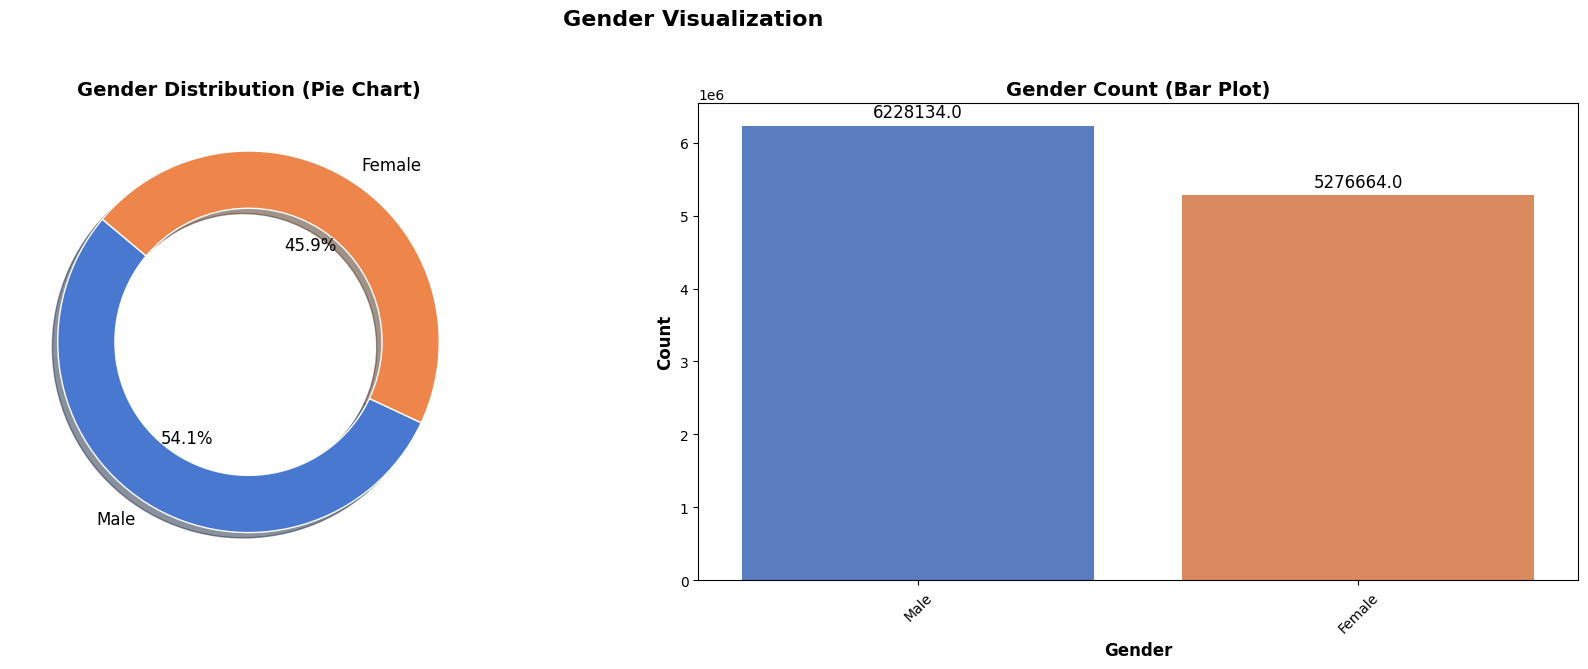

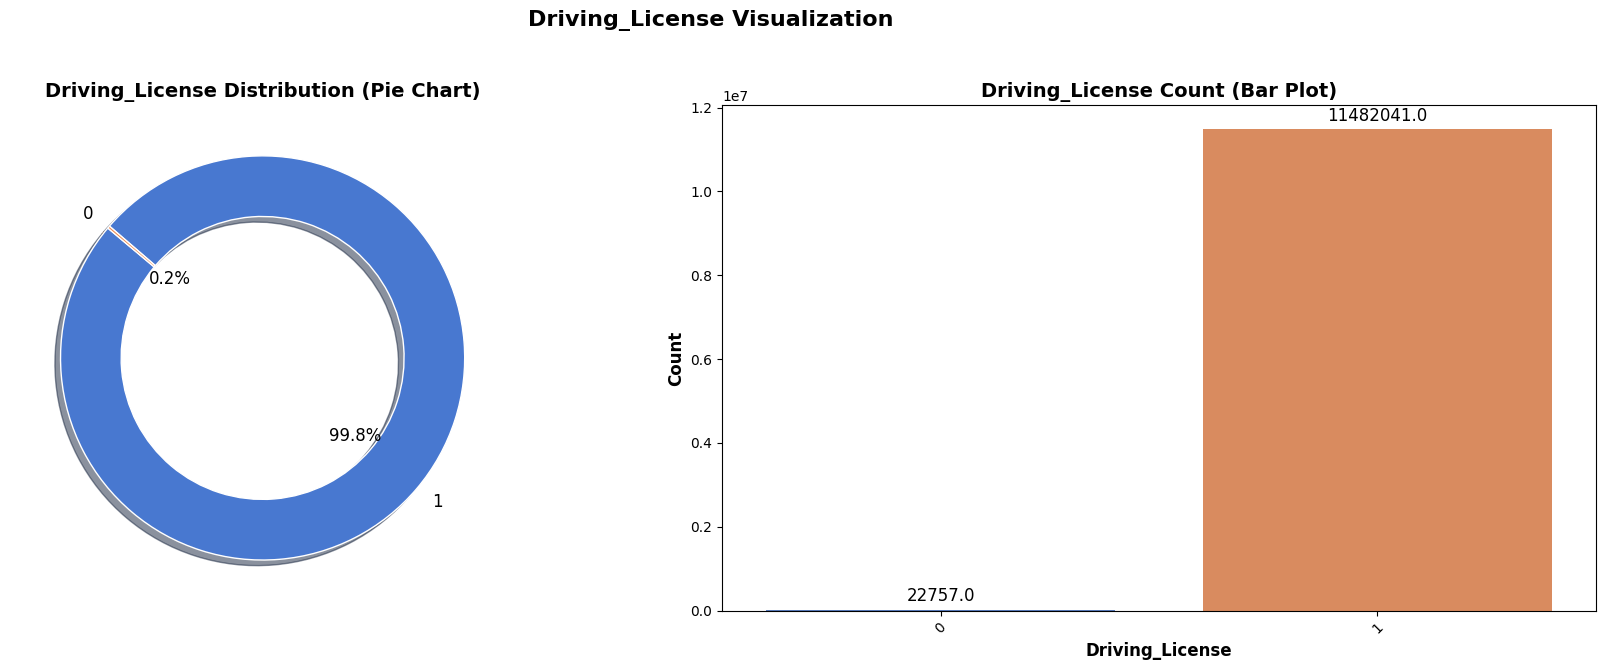

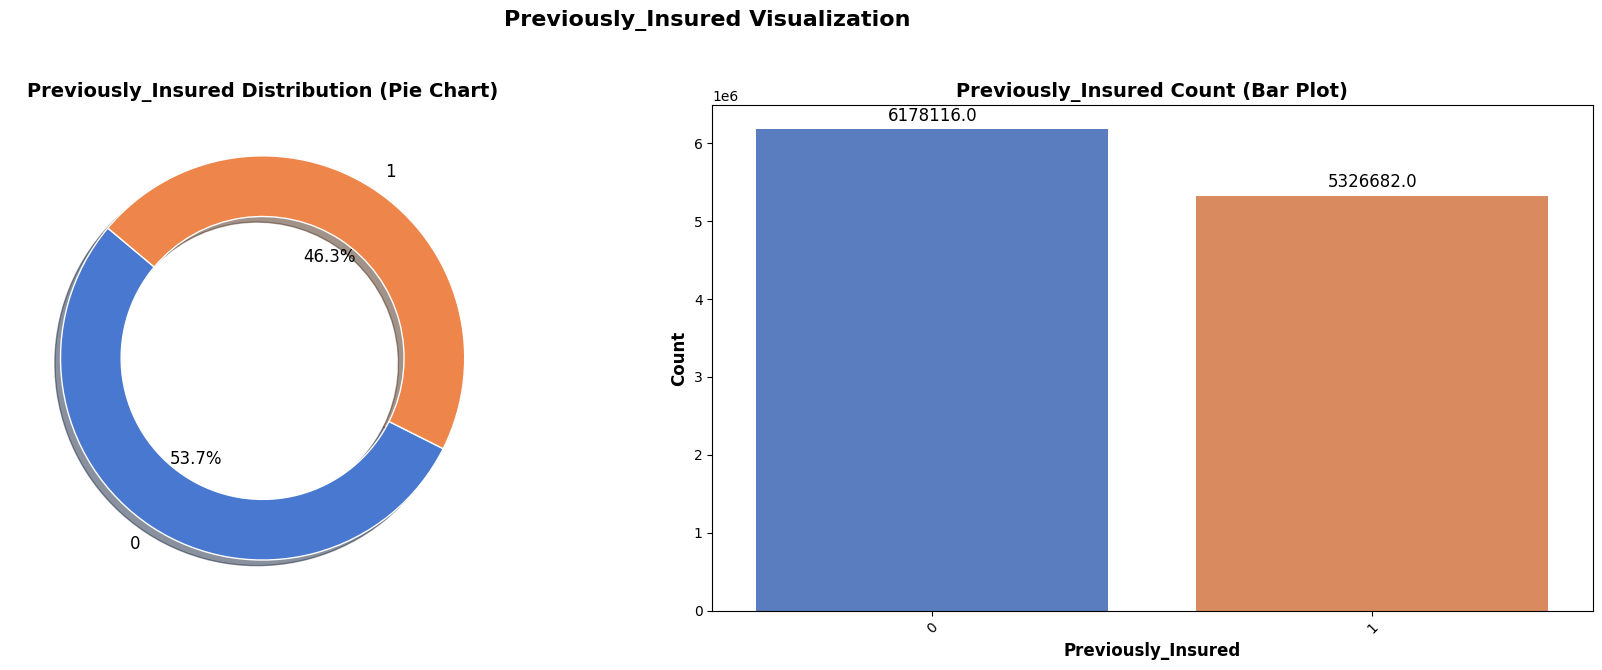

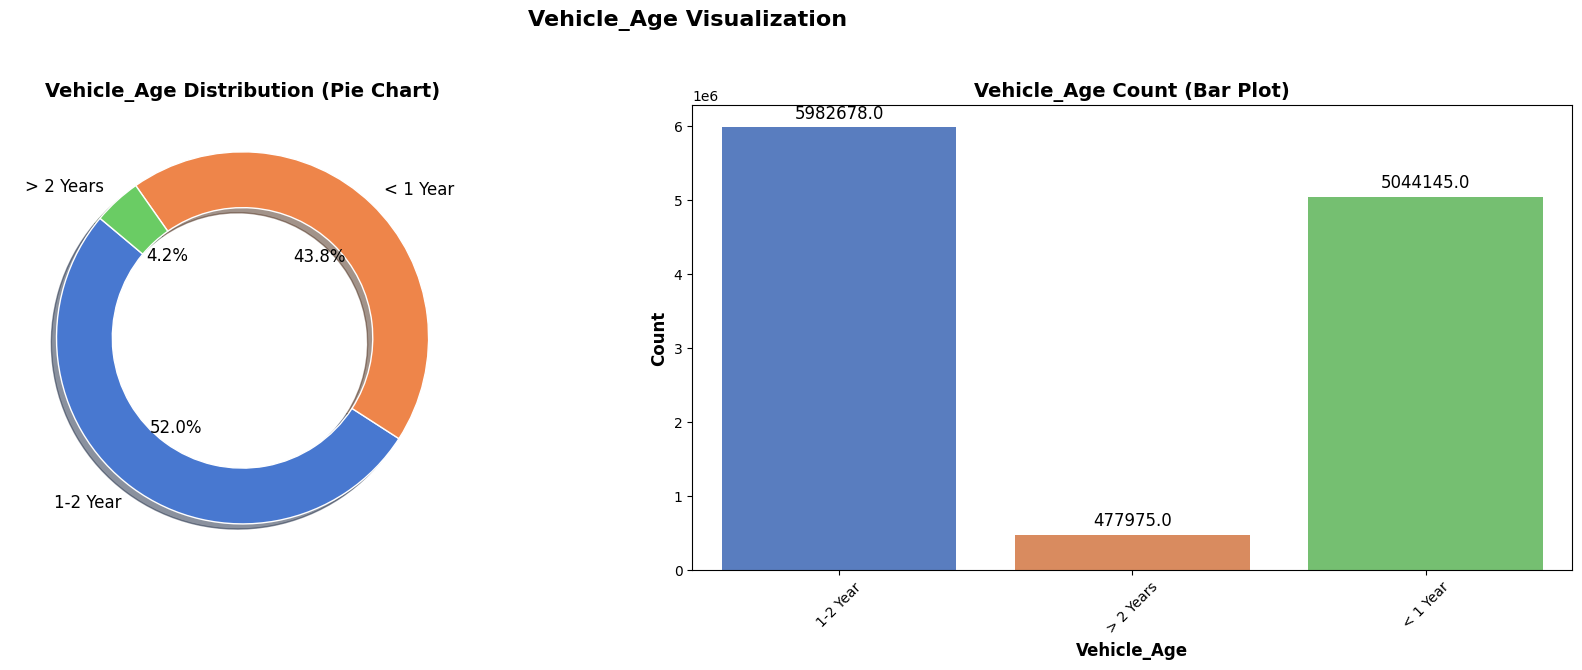

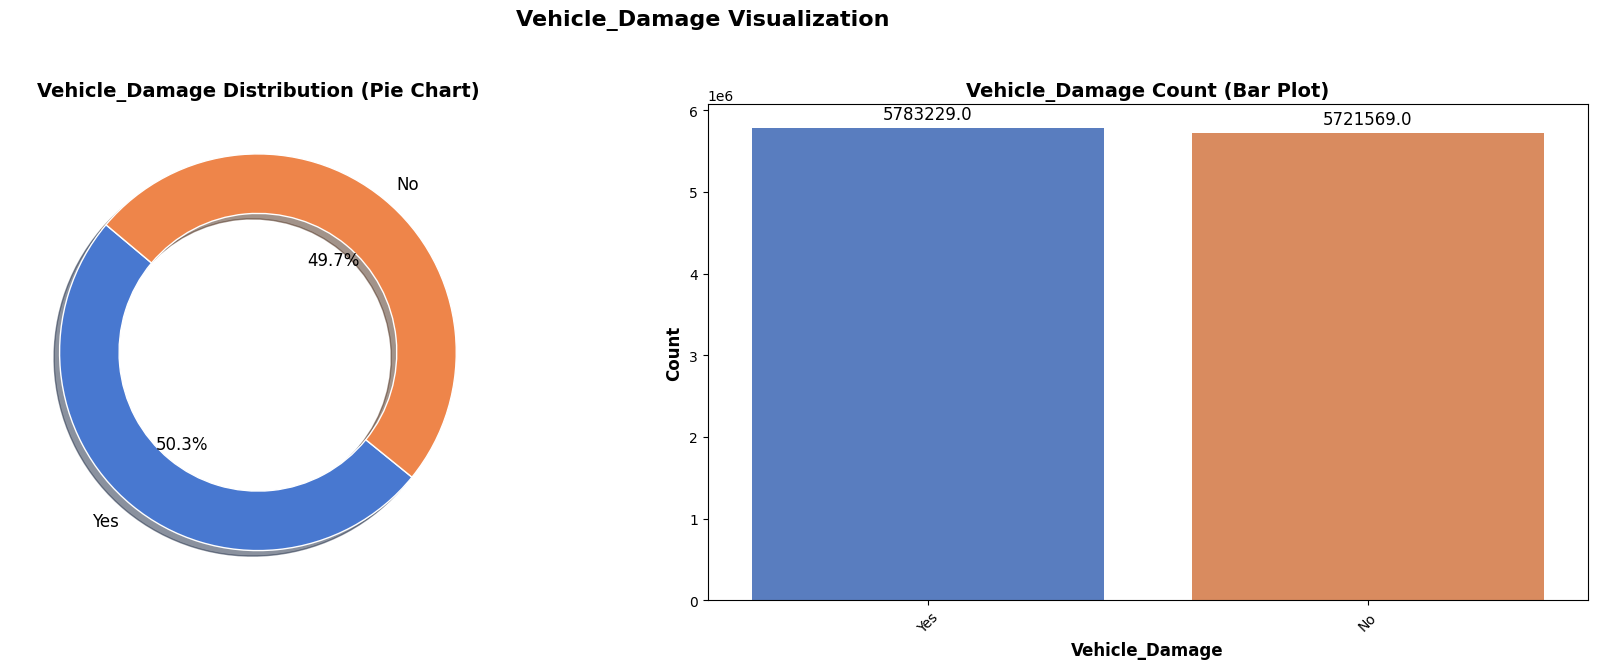

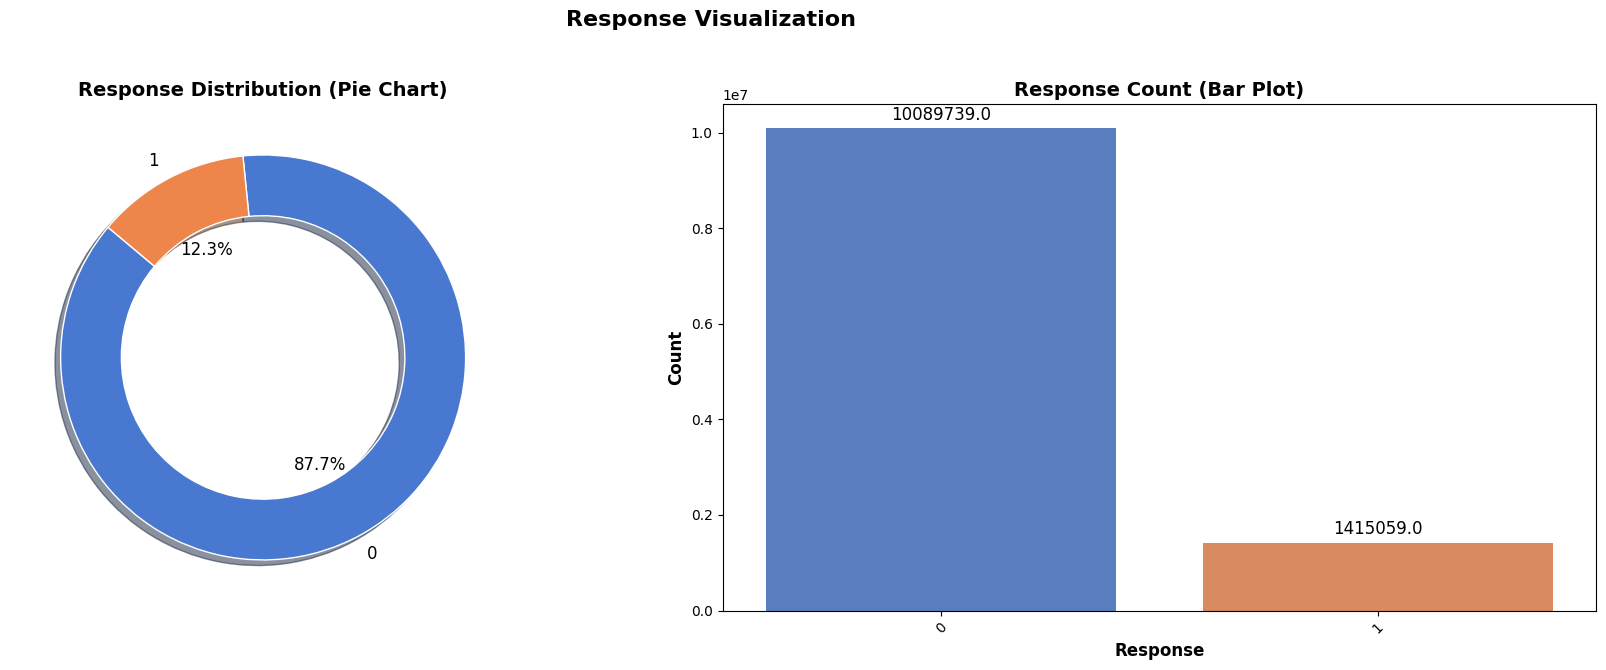

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming train_eda is your DataFrame

unique_counts = train_eda.nunique()

threshold = 12
continuous_vars = unique_counts[unique_counts > threshold].index.tolist()
categorical_vars = unique_counts[unique_counts <= threshold].index.tolist()
if 'id' in continuous_vars:
    continuous_vars.remove('id')

custom_palette = sns.color_palette("muted")

for column in categorical_vars:
    f, ax = plt.subplots(1, 2, figsize=(18, 7))
    
    # Pie Chart
    train_eda[column].value_counts().plot.pie(
        autopct='%1.1f%%', ax=ax[0], shadow=True, colors=custom_palette, startangle=140, 
        wedgeprops=dict(width=0.3, edgecolor='w'), textprops={'fontsize': 12})
    ax[0].set_ylabel('')
    ax[0].set_title(f'{column} Distribution (Pie Chart)', fontsize=14, fontweight='bold')
    
    # Bar Plot
    sns.countplot(x=column, data=train_eda, ax=ax[1], palette=custom_palette)
    ax[1].set_xlabel(f'{column}', fontsize=12, fontweight='bold')
    ax[1].set_ylabel('Count', fontsize=12, fontweight='bold')
    ax[1].set_title(f'{column} Count (Bar Plot)', fontsize=14, fontweight='bold')
    
    # Rotate x-ticks for better readability
    ax[1].tick_params(axis='x', rotation=45)
    
    # Add annotations to the bar plot
    for p in ax[1].patches:
        height = p.get_height()
        ax[1].annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), 
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)
    
    plt.suptitle(f'{column} Visualization', fontsize=16, fontweight='bold')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit titles
    plt.show()


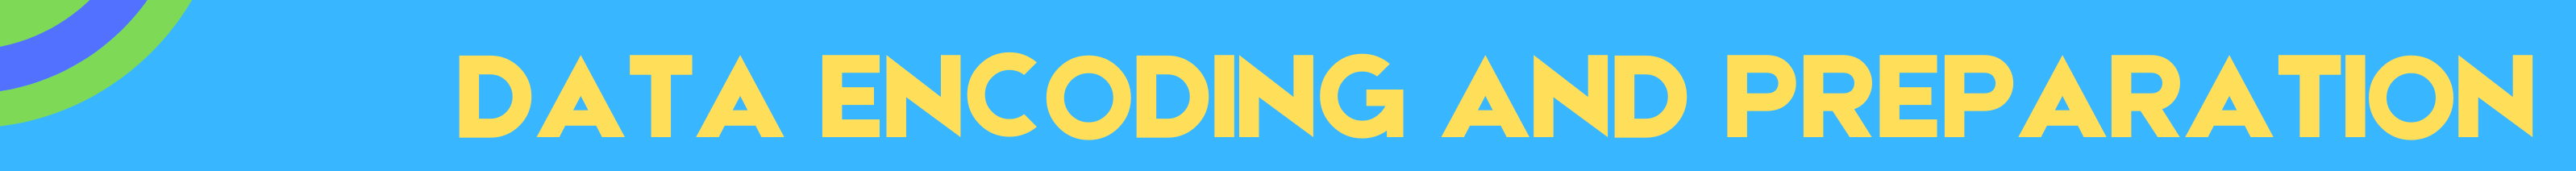

In this section, I concatenate the training and test datasets into a single DataFrame (`df`) to facilitate preprocessing. The data undergoes transformations to convert categorical variables into numerical values suitable for machine learning models:

- **Gender**: Converted to 0 for Male and 1 for Female.
- **Region_Code**: Cast to integers.
- **Vehicle_Age**: Mapped to 0 for `< 1 Year`, 1 for `1-2 Year`, and 2 for `> 2 Years`.
- **Vehicle_Damage**: Converted to 0 for No and 1 for Yes.
- **Annual_Premium** and **Policy_Sales_Channel**: Cast to integers.

Additional features are added as well.

After preprocessing, the combined DataFrame is split back into the original training and test sets (`train` and `test`), now ready for model training and evaluation.

In [4]:
## prepare data
df = pl.concat([train, test])

df = df.with_columns([
    pl.col('Gender').replace({'Male': 0, 'Female': 1}).cast(pl.Int32),
    pl.col('Region_Code').cast(int),
    pl.col('Vehicle_Age').replace({'< 1 Year': 0, '1-2 Year': 1, '> 2 Years': 2}).cast(pl.Int32),
    pl.col('Vehicle_Damage').replace({'No': 0, 'Yes': 1}).cast(pl.Int32),
    pl.col('Annual_Premium').cast(int),
    pl.col('Policy_Sales_Channel').cast(int)
])

df = df.with_columns([
    (pl.Series(pd.factorize((df['Previously_Insured'].cast(str) + df['Annual_Premium'].cast(str)).to_numpy())[0])).alias('Previously_Insured_Annual_Premium'),
    (pl.Series(pd.factorize((df['Previously_Insured'].cast(str) + df['Vehicle_Age'].cast(str)).to_numpy())[0])).alias('Previously_Insured_Vehicle_Age'),
    (pl.Series(pd.factorize((df['Previously_Insured'].cast(str) + df['Vehicle_Damage'].cast(str)).to_numpy())[0])).alias('Previously_Insured_Vehicle_Damage'),
    (pl.Series(pd.factorize((df['Previously_Insured'].cast(str) + df['Vintage'].cast(str)).to_numpy())[0])).alias('Previously_Insured_Vintage')
])

train = df[:train.shape[0]].to_pandas()
test = df[train.shape[0]:].to_pandas()

train

id  Gender  Age  Driving_License  Region_Code  \
0              0       0   21                1           35   
1              1       0   43                1           28   
2              2       1   25                1           14   
3              3       1   35                1            1   
4              4       1   36                1           15   
...          ...     ...  ...              ...          ...   
11885902  381105       0   74                1           26   
11885903  381106       0   30                1           37   
11885904  381107       0   21                1           30   
11885905  381108       1   68                1           14   
11885906  381109       0   46                1           29   

          Previously_Insured  Vehicle_Age  Vehicle_Damage  Annual_Premium  \
0                          0            1               1           65101   
1                          0            2               1           58911   
2                          1            0               0           38043   
3                          0            1               1            2630   
4                          1            1               0           31951   
...                      ...          ...             ...             ...   
11885902                   1            1               0           30170   
11885903                   1            0               0           40016   
11885904                   1            0               0           35118   
11885905                   0            2               1           44617   
11885906                   0            1               0           41777   

          Policy_Sales_Channel  Vintage  Response  \
0                          124      187         0   
1                           26      288         1   
2                          152      254         0   
3                          156       76         0   
4                          152      294         0   
...                        ...      ...       ...   
11885902                    26       88         0   
11885903                   152      131         0   
11885904                   160      161         0   
11885905                   124       74         0   
11885906                    26      237         0   

          Previously_Insured_Annual_Premium  Previously_Insured_Vehicle_Age  \
0                                         0                               0   
1                                         1                               1   
2                                         2                               2   
3                                         3                               0   
4                                         4                               3   
...                                     ...                             ...   
11885902                               5481                               3   
11885903                              50153                               2   
11885904                              43917                               2   
11885905                              20087                               1   
11885906                              26081                               0   

          Previously_Insured_Vehicle_Damage  Previously_Insured_Vintage  
0                                         0                           0  
1                                         0                           1  
2                                         1                           2  
3                                         0                           3  
4                                         1                           4  
...                                     ...                         ...  
11885902                                  1                         488  
11885903                                  1                         380  
11885904                                  1                         240  
118859

In [5]:
X_train = train.drop(columns=["id", "Response"])
y_train = train["Response"]

X_test = test.drop(columns=["id", "Response"])
X_test

Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0             1   20                1           47                   0   
1             0   47                1           28                   0   
2             0   47                1           43                   0   
3             1   22                1           47                   1   
4             0   51                1           19                   0   
...         ...  ...              ...          ...                 ...   
7669861       0   57                1           28                   0   
7669862       0   28                1           50                   1   
7669863       0   47                1           33                   1   
7669864       0   30                1           28                   0   
7669865       0   23                1           46                   1   

         Vehicle_Age  Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  \
0                  0               0            2630                   160   
1                  1               1           37483                   124   
2                  1               1            2630                    26   
3                  0               0           24502                   152   
4                  1               0           34115                   124   
...              ...             ...             ...                   ...   
7669861            1               1           51661                   124   
7669862            0               0           25651                   152   
7669863            1               0            2630                   138   
7669864            0               1           38866                   124   
7669865            0               0           27498                   152   

         Vintage  Previously_Insured_Annual_Premium  \
0            228                                  3   
1            123                               1211   
2            271                                  3   
3            115                               7102   
4            148                              14835   
...          ...                                ...   
7669861      109                               8476   
7669862      184                              28152   
7669863       63                                 18   
7669864      119                               5806   
7669865       79                              16482   

         Previously_Insured_Vehicle_Age  Previously_Insured_Vehicle_Damage  \
0                                     4                                  2   
1                                     0                                  0   
2                                     0                                  0   
3                                     2                                  1   
4                                     0                                  2   
...                                 ...                                ...   
7669861                               0                                  0   
7669862                               2                                  1   
7669863                               3                                  1   
7669864                               4                                  0   
7669865                               2                                  1   

         Previously_Insured_Vintage  
0                                55  
1                               230  
2                               392  
3                               325  
4                               415  
...                             ...  
7669861                         518  
7669862                         463  
7669863                         115  
7669864                         247  
7669865                         320  

[7669866 rows x 14 columns]

**K-Fold cross-validation**

This function performs K-Fold cross-validation to assess the model's performance. It accepts the model class, training features (X_train), training targets (y_train), model parameters (params), and the number of folds (n_splits). For each fold, the model is trained on a portion of the data and tested on a different portion. It calculates and shows the training and validation accuracies for each fold and provides the final trained model (clf) and the average validation accuracy (average_val_accuracy).

In [6]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
#I have used 5 splits here.
def cross_validate_model_x(model, X_train, y_train, params, n_splits=5):
    """
    Performs K-Fold cross-validation for a given model, returns the last model and average validation accuracy.

    Parameters:
        model: Machine learning model class (e.g., RandomForestClassifier)
        X_train: Training feature dataset
        y_train: Training target dataset
        params: Dictionary of parameters to initialize the model
        n_splits: Number of folds for cross-validation (default: 10)

    Returns:
        last_model: The last trained model instance
        average_val_accuracy: Average validation accuracy over all folds
    """
    # Initialize variables
    cv = KFold(n_splits=n_splits, shuffle=True, random_state=0)
    val_scores = []
    test_preds = np.zeros((len(X_test), n_splits), dtype=np.float32)
    # Cross-validation loop
    for fold, (train_ind, valid_ind) in enumerate(cv.split(X_train)):
        # Data splitting
        X_fold_train = X_train.iloc[train_ind]
        y_fold_train = y_train.iloc[train_ind]
        X_val = X_train.iloc[valid_ind]
        y_val = y_train.iloc[valid_ind]
        
        # Model initialization and training
        clf = model(**params)
        #clf.fit(X_fold_train, y_fold_train)
        clf.fit(X_fold_train, y_fold_train,  eval_set=[(X_val, y_val)],verbose=500, early_stopping_rounds=50)
        # Predict and evaluate
        y_pred_trn = clf.predict(X_fold_train)
        y_pred_val = clf.predict(X_val)
        test_preds[:, fold] = clf.predict_proba(X_test)[:, 1]
        train_acc = accuracy_score(y_fold_train, y_pred_trn)
        val_acc = accuracy_score(y_val, y_pred_val)
        print(f"Fold: {fold}, Train Accuracy: {train_acc:.5f}, Val Accuracy: {val_acc:.5f}")
        print("-" * 50)
        print(test_preds)
        # Accumulate validation scores
        val_scores.append(val_acc)

    # Calculate the average validation score
    average_val_accuracy = np.mean(val_scores)
    print("Average Validation Accuracy:", average_val_accuracy)
    test_preds= np.mean(test_preds, axis=1)
    return clf, average_val_accuracy,test_preds

In [7]:
from xgboost import XGBClassifier
xgb_params={

   
    'alpha': 1.302348865795227e-06, 
    'max_depth': 16, 
    'learning_rate': 0.061800451723613786, 
    'subsample': 0.7098803046786328, 
    'colsample_bytree': 0.2590672912533101, 
    'min_child_weight': 10, 
    'gamma': 0.8399887056014855, 
    'reg_alpha': 0.0016943548302122801, 
    'n_estimators': 12000,
    'max_bin': 71284,
    'device': 'cuda',
    'eval_metric': 'auc'
    
}


print('XGBoost Cross-Validation Results:\n')
xgb_model, xgb_mean_accuracy, test_predsx = cross_validate_model_x(XGBClassifier, X_train, y_train, xgb_params)

XGBoost Cross-Validation Results:

[0]	validation_0-auc:0.83994
[500]	validation_0-auc:0.88896
[1000]	validation_0-auc:0.89088
[1500]	validation_0-auc:0.89159
[2000]	validation_0-auc:0.89197
[2500]	validation_0-auc:0.89218
[2570]	validation_0-auc:0.89220
Fold: 0, Train Accuracy: 0.89322, Val Accuracy: 0.88615
--------------------------------------------------
[[2.7823246e-03 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [5.6208473e-01 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [2.4490622e-01 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 ...
 [1.8554072e-04 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [6.6668463e-01 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [5.6408189e-05 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]]
[0]	validation_0-auc:0.84041
[500]	validation_0-auc:0.88891
[1000]	validation_0-auc:0.89092
[1500]	validation_0-auc:0.89179
[2000]	validation_0-auc:0.89212
[2500]	validation_0-auc:0.89230
[3000]

In [8]:
xgb_preds = xgb_model.predict_proba(X_test)[:, 1]
xgb_preds_labels = xgb_preds
xgb_preds_labels

xgb_result =  pd.read_csv('/kaggle/input/playground-series-s4e7/sample_submission.csv')
xgb_result['Response'] = xgb_preds_labels
#xgb_result.to_csv('result_xgb.csv', index=False)
xgb_result

id  Response
0        11504798  0.003512
1        11504799  0.617645
2        11504800  0.222656
3        11504801  0.000069
4        11504802  0.083819
...           ...       ...
7669861  19174659  0.195034
7669862  19174660  0.000152
7669863  19174661  0.000328
7669864  19174662  0.602594
7669865  19174663  0.000047

[7669866 rows x 2 columns]

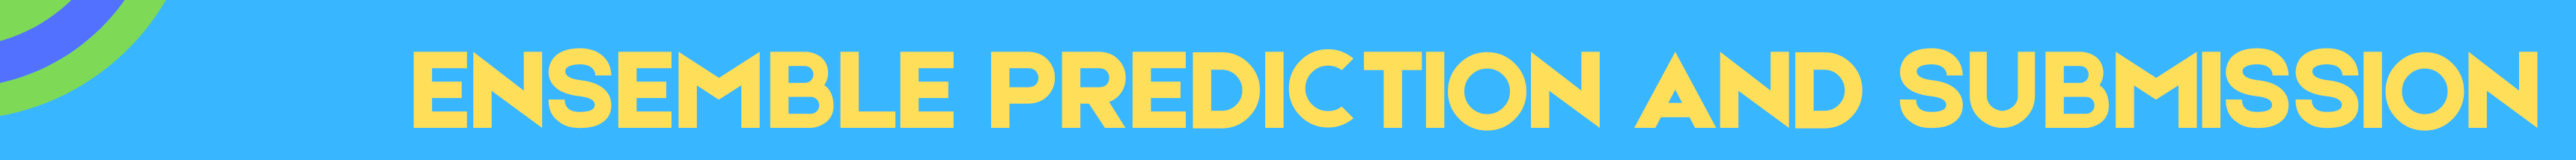

In [9]:
submission_x = pd.read_csv('/kaggle/input/playground-series-s4e7/sample_submission.csv')
submission_x['Response'] = test_predsx.astype(np.float32)
submission_x['id'] = submission_x['id'].astype(np.int32)
#submission.to_csv('submission.csv', index=False)
submission_x.to_csv('submission.csv',index=False)
submission_x

id  Response
0        11504798  0.002992
1        11504799  0.628921
2        11504800  0.252014
3        11504801  0.000084
4        11504802  0.100283
...           ...       ...
7669861  19174659  0.190816
7669862  19174660  0.000128
7669863  19174661  0.000223
7669864  19174662  0.630344
7669865  19174663  0.000047

[7669866 rows x 2 columns]